<div class="alert alert-success"><h1 style='text-align:center;'>Import Libraries</h1></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-success"><h1 style='text-align:center;'>Load Cleaned Dataset</h1></div>

In [2]:
df = pd.read_csv('/kaggle/input/cleaned-reviews/cleaned_amazon_reviews.csv')

<div class="alert alert-success"><h1 style='text-align:center;'>EDA</h1></div>

In [3]:
df.head()

,Sentiment,Title,Review,Cleaned_Review
0,0,Wanna be anti war movie,"[...].As a Vietnam veteran, one tour enlisted,...",vietnam veteran one tour enlisted one tour off...
1,1,Beyond the Wild Bunch,I found the book to be very informative and he...,found book informative helpful however title b...
2,0,Disapointed,"The movie was OK, certainly not as good as the...",movie certainly good others however biggest pr...
3,0,PUSS - stick to shrek,I was so looking forward to this film. I actua...,looking forward film actually waited thanksgiv...
4,0,"rude, bad grammar girl... not good for young k...",My son and I just read through our first book ...,son read first book disappointed rude lots hat...


## Sentiment Distribution

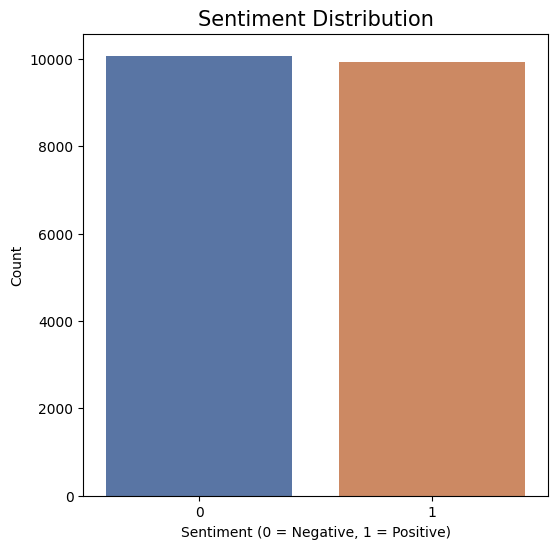

In [4]:
plt.figure(figsize=(6,6))
sns.countplot(x='Sentiment', data=df, palette='deep')
plt.title('Sentiment Distribution', fontsize=15)
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.show()

## Review Length Distribution

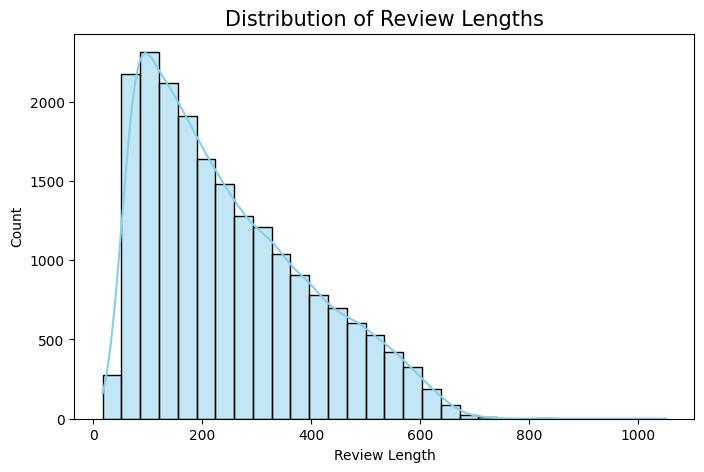

In [5]:
df['Cleaned_Review'].apply(len)

plt.figure(figsize=(8,5))
sns.histplot(df['Cleaned_Review'].apply(len), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Review Lengths', fontsize=15)
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

## Word Cloud for Frequent Words

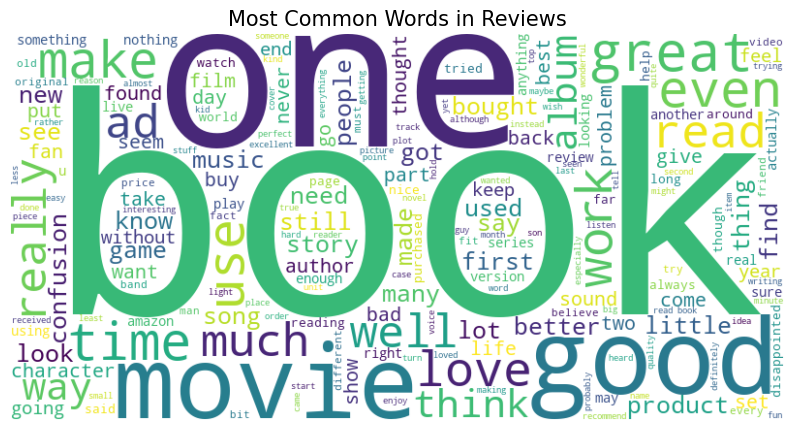

In [6]:
from wordcloud import WordCloud

# A word cloud to visualize the most common words in reviews
all_reviews = ' '.join(df['Cleaned_Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews', fontsize=15)
plt.show()

## Bi-gram Frequency

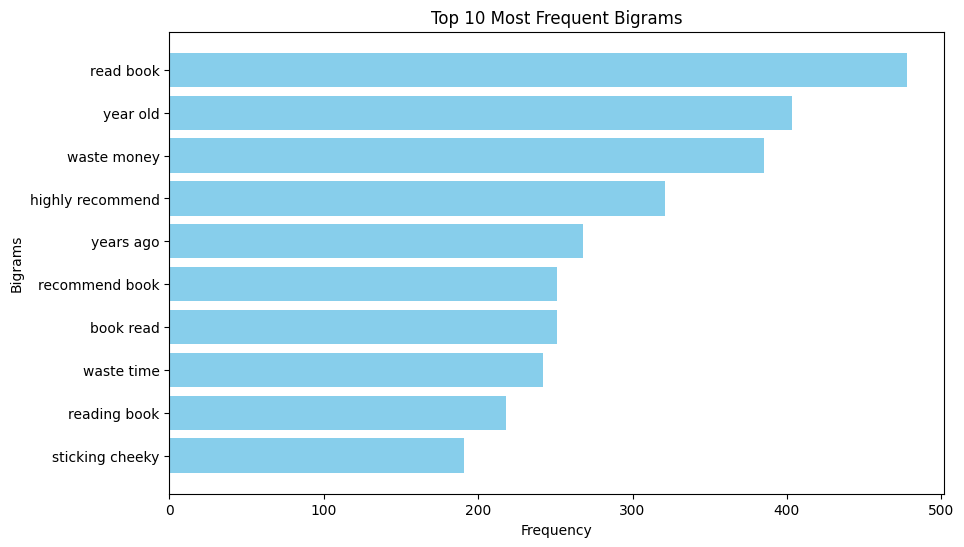

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Create bigrams using CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X_bigrams = vectorizer.fit_transform(df['Cleaned_Review'])

# Summing up the occurrences of each bigram
bigram_freq = X_bigrams.sum(axis=0).A1  # Flatten the result to a 1D array

# Creating a DataFrame with bigram frequencies
bigram_df = pd.DataFrame({'Bigram': vectorizer.get_feature_names_out(), 'Frequency': bigram_freq})

# Sort the DataFrame by frequency
bigram_df = bigram_df.sort_values(by='Frequency', ascending=False).head(10)

# Plot the top 10 bigrams
plt.figure(figsize=(10, 6))
plt.barh(bigram_df['Bigram'], bigram_df['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Top 10 Most Frequent Bigrams')
plt.gca().invert_yaxis()
plt.show()


<div class="alert alert-success"><h1 style='text-align:center;'>TF-IDF Vectorization</h1></div>

In [4]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Cleaned_Review'])
y = df['Sentiment']

<div class="alert alert-success"><h1 style='text-align:center;'>Train-Test Split</h1></div>

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [10]:
print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')

Training data shape: (16000, 5000)
Testing data shape: (4000, 5000)


<div class="alert alert-success"><h1 style='text-align:center;'>ML Models</h1></div>

In [11]:
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = []
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict the test data
        y_pred = model.predict(X_test)
        
        # Evaluate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store the results
        results.append({
            'Model': name,
            'Accuracy': accuracy
        })
        
        # Print detailed classification report (optional)
        print(f"Classification Report for {name}:")
        print(classification_report(y_test, y_pred))
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    return results_df

In [12]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

In [13]:
results_df = evaluate_models(models, X_train, X_test, y_train, y_test)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2014
           1       0.85      0.85      0.85      1986

    accuracy                           0.85      4000
   macro avg       0.85      0.85      0.85      4000
weighted avg       0.85      0.85      0.85      4000

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      2014
           1       0.82      0.82      0.82      1986

    accuracy                           0.82      4000
   macro avg       0.82      0.82      0.82      4000
weighted avg       0.82      0.82      0.82      4000

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2014
           1       0.85      0.85      0.85      1986

    accuracy                           0.85      4000
   macro 

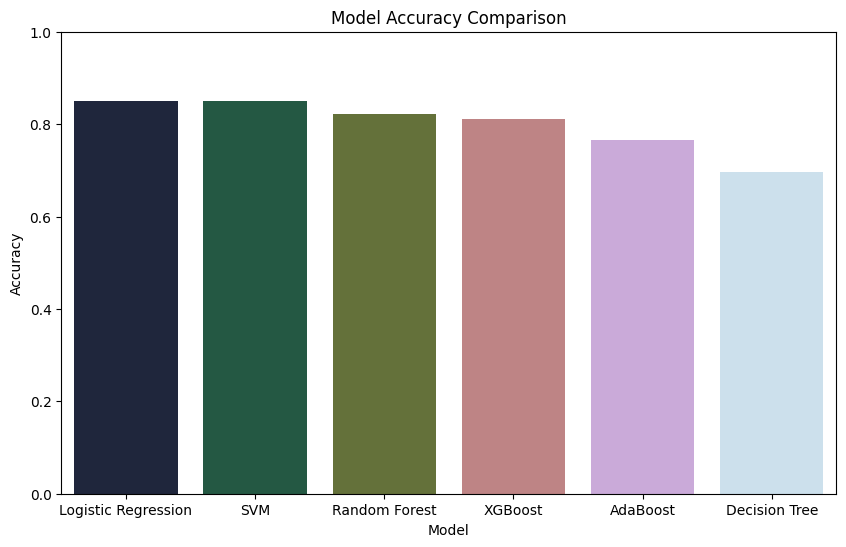

In [14]:
# Sort the DataFrame by Accuracy
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='cubehelix')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set x-axis limit from 0 to 1 for accuracy
plt.show()

<div class="alert alert-success"><h1 style='text-align:center;'>Save Tfidf-Vectorizer</h1></div>

In [21]:
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
print("TfidfVectorizer has been saved.")

TfidfVectorizer has been saved.


<div class="alert alert-success"><h1 style='text-align:center;'>Save the Best Model</h1></div>

In [15]:
# Select the best model
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f'The best model is: {best_model_name}')

joblib.dump(best_model, f'{best_model_name}_model.pkl')
print(f'The best model ({best_model_name}) has been saved.')

The best model is: Logistic Regression
The best model (Logistic Regression) has been saved.


<div class="alert alert-success"><h1 style='text-align:center;'>Load the Model</h1></div>

In [11]:
def preprocessing(df):
    corpus = []
    
    for i in df['Review'].values:
        review = i
        
        # Expand contraction in text (e.g., can't → cannot)
        review = ct.fix(review)
        
        # Replace emojis with textual descriptions
        for emo in Emojis:
            review = re.sub(u'('+emo+')', '_'.join(Emojis[emo].replace(',', '').split()), review)
        
        # Remove HTML tags
        review = BeautifulSoup(review, "lxml").get_text()
    
        # Remove URLs and mentions
        review = re.sub(r'http\S+|@\S+', '', review)
        
        # Remove non-alphabetic characters
        review = re.sub("[^a-zA-Z]", ' ', review)
        
        # Lowercase
        review = review.lower()
        
        # Tokenization
        review = word_tokenize(review)
        
        # Spelling Correction (optional: this can be slow)
        review = [spell.correction(i) if spell.correction(i) else i for i in review]
        
        # Remove stopwords
        review = [word for word in review if word not in stopwords.words('english')]
        
        # Lemmatization (preferred over stemming)
        #review = [lemmatizer.lemmatize(word) for word in review]
        
        # Join tokens back to form the cleaned review text
        review = ' '.join(review)
        
        corpus.append(review)
    
    return corpus

In [2]:
tfidf_vectorizer = joblib.load('/kaggle/input/tfidf/tensorflow2/default/1/tfidf_vectorizer.pkl')
model = joblib.load('/kaggle/input/logistic-regression/tensorflow2/default/1/Logistic Regression_model.pkl')

<div class="alert alert-success"><h1 style='text-align:center;'>Make Predictions</h1></div>

In [5]:
test_df = pd.read_csv('/kaggle/input/collected-dataset/cleaned_collected_data.csv')
print(test_df.shape)
test_df.head()

(243, 3)


,review_rating,review_body,Cleaned_Review
0,1,They originally shipped me the wrong color. I ...,originally shipped wrong color let know sent c...
1,1,It was very nice looks and feel. It is very pr...,nice looks feel practical durables survived in...
2,1,I travel frequently and have ordered several s...,travel frequently ordered several styles cosme...
3,0,I have the bag in camel and use it as a daily ...,bag camel use daily travel bag fully loaded ma...
4,1,"I really like this makeup bag. When it's open,...",really like makeup bag open see everything eas...


In [6]:
def predict_sentiment(reviews, vectorizer, model):
    sentiments = []
    
    for review in reviews:
        # Check if the review is empty or contains only spaces
        if isinstance(review, str) and review.strip() == '':
            sentiments.append('No prediction (empty input)')
        else:
            review = vectorizer.transform([review])
            pred = model.predict(review)
            
            sentiment = 'Positive' if pred[0] == 1 else 'Negative'
            sentiments.append(sentiment)
            
    return sentiments

In [7]:
test = test_df.rename(columns={
    'review_rating': 'Sentiments',
    'review_body': 'Review',
    'Cleaned_Review': 'Cleaned_Review'
})

In [8]:
test.head()

,Sentiments,Review,Cleaned_Review
0,1,They originally shipped me the wrong color. I ...,originally shipped wrong color let know sent c...
1,1,It was very nice looks and feel. It is very pr...,nice looks feel practical durables survived in...
2,1,I travel frequently and have ordered several s...,travel frequently ordered several styles cosme...
3,0,I have the bag in camel and use it as a daily ...,bag camel use daily travel bag fully loaded ma...
4,1,"I really like this makeup bag. When it's open,...",really like makeup bag open see everything eas...


In [9]:
reviews = test['Cleaned_Review']

In [10]:
test['Sentiment_Prediction'] = predict_sentiment(reviews, tfidf_vectorizer, model)

In [22]:
test.head(20)

,Sentiments,Review,Cleaned_Review,Sentiment_Prediction
0,1,They originally shipped me the wrong color. I ...,originally shipped wrong color let know sent c...,Positive
1,1,It was very nice looks and feel. It is very pr...,nice looks feel practical durables survived in...,Positive
2,1,I travel frequently and have ordered several s...,travel frequently ordered several styles cosme...,Positive
3,0,I have the bag in camel and use it as a daily ...,bag camel use daily travel bag fully loaded ma...,Positive
4,1,"I really like this makeup bag. When it's open,...",really like makeup bag open see everything eas...,Positive
5,1,Great multipurpose bag!!! This one can be used...,great multipurpose bag one used makeup bag put...,Positive
6,1,Perfect size for all your travel needs.,perfect size travel needs,Positive
7,1,A lot fits in it. I love it.,lot fits love,Positive
8,1,This holds so much stuff! I was pleasantly sur...,holds much stuff pleasantly surprised could fi...,Positive
9,0,I use this makeup bag as my permanent makeup b...,use makeup bag permanent makeup bag well trave...,Positive
